# Planet: Understanding the Amazon deforestation from Space challenge

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
Train_dataset = pd.read_csv("train_classes.csv")
Train_dataset.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
Test_dataset = pd.read_csv('sample_submission.csv')
Test_dataset.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [4]:
Train_dataset.shape

(40479, 2)

In [5]:
Test_dataset.shape

(61191, 2)

#### Generating labels

In [6]:
Labels = Train_dataset['tags'].apply(lambda x: x.split(' '))

In [7]:
Labels

0                                          [haze, primary]
1                     [agriculture, clear, primary, water]
2                                         [clear, primary]
3                                         [clear, primary]
4          [agriculture, clear, habitation, primary, road]
                               ...                        
40474                                     [clear, primary]
40475                                             [cloudy]
40476                        [agriculture, clear, primary]
40477                  [agriculture, clear, primary, road]
40478    [agriculture, cultivation, partly_cloudy, prim...
Name: tags, Length: 40479, dtype: object

#### Generating distinct labels

In [8]:
Label_list=[]
for i in Labels:
    for j in i:
        if j not in Label_list:
            Label_list.append(j)

In [9]:
Label_list

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [10]:
x_train = []
x_test = []
y_train = []

In [11]:
Label_map = {r: i for i, r in enumerate(Label_list)}

In [12]:
Label_map

{'haze': 0,
 'primary': 1,
 'agriculture': 2,
 'clear': 3,
 'water': 4,
 'habitation': 5,
 'road': 6,
 'cultivation': 7,
 'slash_burn': 8,
 'cloudy': 9,
 'partly_cloudy': 10,
 'conventional_mine': 11,
 'bare_ground': 12,
 'artisinal_mine': 13,
 'blooming': 14,
 'selective_logging': 15,
 'blow_down': 16}

In [13]:
from tqdm import tqdm
import cv2

In [14]:
for f, tags in tqdm(Train_dataset.values, miniters=1000):
    img = cv2.imread('train-jpg\{}.jpg'.format(f))
    img = cv2.resize(img,(64,64))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[Label_map[t]] = 1
    x_train.append(img)
    y_train.append(targets)

100%|███████████████████████████████████████████████████████████████████████████| 40479/40479 [05:14<00:00, 128.83it/s]


In [17]:
for f, tags in tqdm(Test_dataset.values, miniters=1000):
    img = cv2.imread('test-jpg\{}.jpg'.format(f))
    img = cv2.resize(img,(64,64))
    x_test.append(cv2.resize(img,(64, 64)))

100%|████████████████████████████████████████████████████████████████████████████| 61191/61191 [31:35<00:00, 32.28it/s]


In [18]:
x_train

[array([[[101, 109,  92],
         [108, 114, 102],
         [104, 111,  97],
         ...,
         [105, 111,  94],
         [102, 106,  87],
         [103, 109,  95]],
 
        [[105, 108,  94],
         [104, 113,  96],
         [107, 112,  96],
         ...,
         [102, 109,  93],
         [106, 114,  95],
         [101, 107,  87]],
 
        [[104, 108,  93],
         [104, 108,  94],
         [106, 113,  98],
         ...,
         [101, 106,  86],
         [103, 109,  93],
         [ 99, 106,  85]],
 
        ...,
 
        [[105, 113,  96],
         [105, 110,  91],
         [106, 108,  93],
         ...,
         [102, 110,  92],
         [104, 110,  91],
         [106, 110,  90]],
 
        [[106, 115,  97],
         [105, 112,  92],
         [107, 111,  90],
         ...,
         [105, 113,  96],
         [105, 107,  87],
         [105, 107,  89]],
 
        [[108, 112,  95],
         [109, 115, 100],
         [105, 114,  95],
         ...,
         [103, 110,  91],
  

In [19]:
y_train

[array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 

In [21]:
y_train = np.array(y_train)
x_train = np.array(x_train, np.float32)/255.0

In [22]:
x_test  = np.array(x_test, np.float32)/255.0

In [23]:
print(x_train.shape)
print(y_train.shape)

(40479, 64, 64, 3)
(40479, 17)


In [24]:
print(x_test.shape)

(61191, 64, 64, 3)


In [25]:
# Split between training and validation sets
split = 32000 # Approx. 80% for training and 20% for validation
x_train, x_valid, y_train, y_valid = (x_train[:split], x_train[split:], y_train[:split], y_train[split:])

In [26]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [27]:
np.random.seed(1580)

In [30]:
# Create structure of Convolutional Neural Network

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# Train model              
history = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
500/500 [==============================] - 474s 936ms/step - loss: 0.2614 - accuracy: 0.8347 - val_loss: 0.2224 - val_accuracy: 0.8869
Epoch 2/10
500/500 [==============================] - 485s 969ms/step - loss: 0.2290 - accuracy: 0.8761 - val_loss: 0.2178 - val_accuracy: 0.8842
Epoch 3/10
500/500 [==============================] - 489s 978ms/step - loss: 0.2245 - accuracy: 0.8769 - val_loss: 0.2147 - val_accuracy: 0.8845
Epoch 4/10
500/500 [==============================] - 480s 959ms/step - loss: 0.2193 - accuracy: 0.8769 - val_loss: 0.2119 - val_accuracy: 0.8816
Epoch 5/10
500/500 [==============================] - 460s 920ms/step - loss: 0.2169 - accuracy: 0.8762 - val_loss: 0.2092 - val_accuracy: 0.8828
Epoch 6/10
500/500 [==============================] - 422s 845ms/step - loss: 0.2141 - accuracy: 0.8743 - val_loss: 0.2074 - val_accuracy: 0.8847
Epoch 7/10
500/500 [==============================] - 418s 837ms/step - loss: 0.2121 - accuracy: 0.8734 - val_loss: 0.2037 -

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

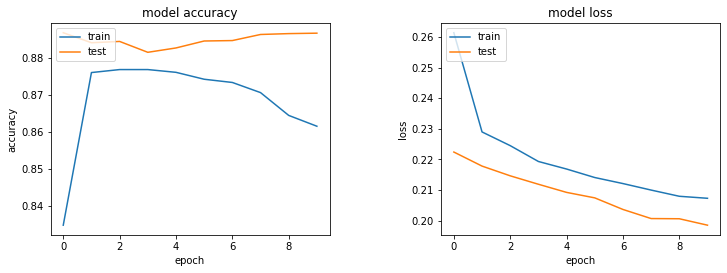

In [33]:
# Plot model accuracy and loss

fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=False)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')


axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
y_test=[]
p_test = model.predict(x_test)
y_test.append(p_test)

In [36]:
result = np.array(y_test[0])
result = pd.DataFrame(result, columns = Label_list)
result

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from tqdm import tqdm
preds = []
for i in tqdm(range(result.shape[0]), miniters=1000):
    a = result.loc[[i]]
    a = a.apply(lambda x: x > 0.2, axis=1)
    a = a.transpose()
    a = a.loc[a[i] == True]
    ' '.join(list(a.index))
    preds.append(' '.join(list(a.index)))

100%|████████████████████████████████████████████████████████████████████████████| 61191/61191 [10:34<00:00, 96.50it/s]


In [47]:
Test_dataset['tags'] = preds

In [48]:
Test_dataset.to_csv('submission1.csv', index=False)